### Passo 1: forncer um conjunto de dados de preços histórico dos ativos.

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Empresa	Código
BTG Pactual	BPAC3 
B3  	  B3SA3
Taesa	  TAEE3
Eneva	  ENEV3
Vale	  VALE3
Cosan	  CSAN3
Weg       WEGE3
TOTVS	  TOTS3
Petrobras PETR3	
Assai     ASAI3	

In [2]:
tickers = ['ASAI3.SA', 'PETR3.SA','TOTS3.SA', 'WEGE3.SA', 'CSAN3.SA', 
           'VALE3.SA', 'ENEV3.SA', 'TAEE3.SA', 'B3SA3.SA','BPAC3.SA']

In [3]:
ohlc = yf.download(tickers, period="max")

[*********************100%***********************]  10 of 10 completed


In [4]:
#Preço diário de fechamento do mercado
preços = ohlc["Adj Close"].dropna(how="all")
preços.tail()

,ASAI3.SA,B3SA3.SA,BPAC3.SA,CSAN3.SA,ENEV3.SA,PETR3.SA,TAEE3.SA,TOTS3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2021-10-13,17.920000,12.85,13.74,23.52,15.38,30.299999,12.51,35.740002,79.199997,40.580002
2021-10-14,17.860001,12.73,13.82,23.50,15.35,30.250000,12.53,36.220001,79.199997,40.599998
2021-10-15,17.540001,13.15,14.06,23.25,15.41,30.160000,12.66,35.290001,80.680000,40.119999
2021-10-18,16.959999,12.92,14.37,23.26,15.30,30.200001,12.66,35.799999,79.919998,40.360001
2021-10-19,16.610001,12.66,14.48,23.00,14.94,29.350000,12.66,35.110001,79.389999,39.639999


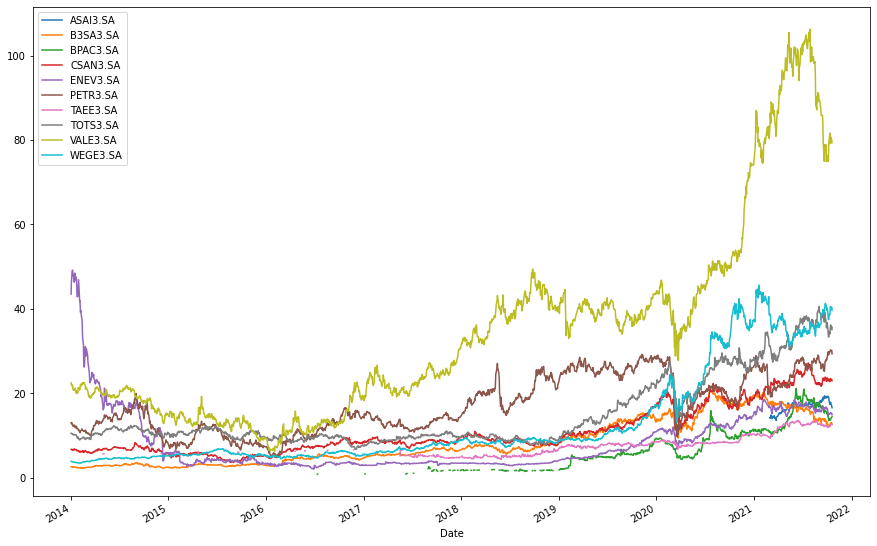

In [5]:
preços[preços.index >= "2014-01-01"].plot(figsize=(15,10));

## Passo 2: Estimando os retornos esperados

In [6]:
import pypfopt
pypfopt.__version__

'1.4.2'

In [7]:
# Retorno Esperado - usando a média histórica
from pypfopt.expected_returns import mean_historical_return
re1= mean_historical_return(preços)
re1

ASAI3.SA    0.281663
B3SA3.SA   -0.040589
BPAC3.SA    0.717986
CSAN3.SA    0.139932
ENEV3.SA   -0.166687
PETR3.SA    0.105112
TAEE3.SA    0.074030
TOTS3.SA    0.216520
VALE3.SA    0.189319
WEGE3.SA    0.304440
dtype: float64

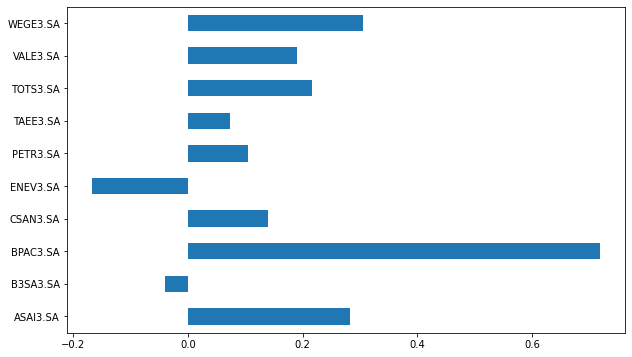

In [8]:
re1.plot.barh(figsize=(10,6));

In [9]:
# Retorno Esperado - calculado pelo CAPM - Ri=Rf+βi(E(Rm)−Rf)
from pypfopt import expected_returns

re2 = expected_returns.capm_return(preços)
re2

ASAI3.SA    0.133880
B3SA3.SA    0.338005
BPAC3.SA    0.281386
CSAN3.SA    0.290379
ENEV3.SA    0.297406
PETR3.SA    0.308345
TAEE3.SA    0.061392
TOTS3.SA    0.197313
VALE3.SA    0.274937
WEGE3.SA    0.184077
Name: mkt, dtype: float64

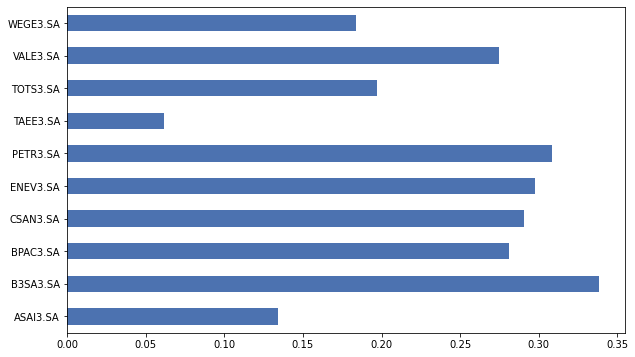

In [11]:
re2.plot.barh(figsize=(10,6));

## Estimando a matriz de covariância

In [10]:
# Esta é a matriz de covariância
from pypfopt import risk_models
from pypfopt import plotting

m_cov = risk_models.sample_cov(preços, frequency=252)
m_cov

,ASAI3.SA,B3SA3.SA,BPAC3.SA,CSAN3.SA,ENEV3.SA,PETR3.SA,TAEE3.SA,TOTS3.SA,VALE3.SA,WEGE3.SA
ASAI3.SA,0.078887,0.040971,0.013015,0.029959,0.034409,0.024504,0.009934,0.030320,0.009201,0.025526
B3SA3.SA,0.040971,0.233984,0.018503,0.082629,0.052882,0.108500,0.009878,0.049749,0.086024,0.057892
BPAC3.SA,0.013015,0.018503,0.504553,0.018088,0.013528,0.012892,0.002022,0.018706,0.006878,0.021525
CSAN3.SA,0.029959,0.082629,0.018088,0.186418,0.044586,0.089142,0.008701,0.036153,0.069927,0.045196
ENEV3.SA,0.034409,0.052882,0.013528,0.044586,0.306108,0.057091,0.007841,0.037647,0.051584,0.035646
PETR3.SA,0.024504,0.108500,0.012892,0.089142,0.057091,0.192322,0.006586,0.045360,0.094730,0.036243
TAEE3.SA,0.009934,0.009878,0.002022,0.008701,0.007841,0.006586,0.044494,0.006642,0.006903,0.006267
TOTS3.SA,0.030320,0.049749,0.018706,0.036153,0.037647,0.045360,0.006642,0.134720,0.038243,0.033875
VALE3.SA,0.009201,0.086024,0.006878,0.069927,0.051584,0.094730,0.006903,0.038243,0.167806,0.030872
WEGE3.SA,0.025526,0.057892,0.021525,0.045196,0.035646,0.036243,0.006267,0.033875,0.030872,0.114290


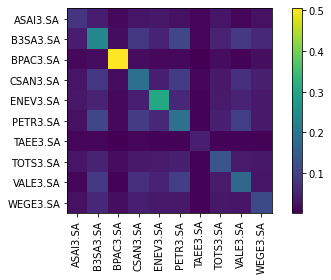

In [12]:
plotting.plot_covariance(m_cov, plot_correlation=False);

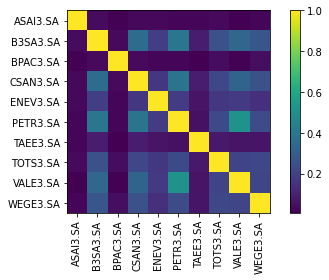

In [13]:
Est_red = risk_models.CovarianceShrinkage(preços).ledoit_wolf()
plotting.plot_covariance(Est_red, plot_correlation=True);

### Passo 3: A carteira que maximiza o Índice de Sharpe

In [14]:
# Pesos de cada Ativo - para maximizar o Índice de Sharpe
from pypfopt import EfficientFrontier

ef = EfficientFrontier (re2,Est_red)
pesos = ef.max_sharpe()
pesos

OrderedDict([('ASAI3.SA', 0.7233970868222218),
             ('B3SA3.SA', 0.0431331808975207),
             ('BPAC3.SA', 0.0825361762672437),
             ('CSAN3.SA', 0.0342371686805334),
             ('ENEV3.SA', 0.034261192467609),
             ('PETR3.SA', 0.0115663701469383),
             ('TAEE3.SA', 0.0179336986641446),
             ('TOTS3.SA', 0.0244257558521938),
             ('VALE3.SA', 0.0201062156634477),
             ('WEGE3.SA', 0.008403154538147)])

In [15]:
cleaned_pesos = ef.clean_weights()
ef.save_weights_to_file("pesos.txt")  # saves to file
cleaned_pesos

OrderedDict([('ASAI3.SA', 0.7234),
             ('B3SA3.SA', 0.04313),
             ('BPAC3.SA', 0.08254),
             ('CSAN3.SA', 0.03424),
             ('ENEV3.SA', 0.03426),
             ('PETR3.SA', 0.01157),
             ('TAEE3.SA', 0.01793),
             ('TOTS3.SA', 0.02443),
             ('VALE3.SA', 0.02011),
             ('WEGE3.SA', 0.0084)])

### O desempenho esperado desse portfólio é:

In [16]:
ef.portfolio_performance(verbose=True)

Expected annual return: 17.1%
Annual volatility: 8.0%
Sharpe Ratio: 1.90


(0.17134503217853214, 0.07973242560800273, 1.8981616453336856)

### Minimizando a volatilidade para um determinado retorno - sugerido por Markowitz

In [17]:
Est_red = risk_models.CovarianceShrinkage(preços).ledoit_wolf()

# You don't have to provide expected returns in this case
ef = EfficientFrontier(None, Est_red, weight_bounds=(None, None))
ef.min_volatility()
pesos_2 = ef.clean_weights()
pesos_2

OrderedDict([('ASAI3.SA', 0.75701),
             ('B3SA3.SA', 0.00167),
             ('BPAC3.SA', 0.03504),
             ('CSAN3.SA', 0.00895),
             ('ENEV3.SA', 0.00936),
             ('PETR3.SA', 0.00131),
             ('TAEE3.SA', 0.13232),
             ('TOTS3.SA', 0.02348),
             ('VALE3.SA', 0.0118),
             ('WEGE3.SA', 0.01905)])

In [18]:
ef.portfolio_performance(verbose=True)

Annual volatility: 7.0%


(None, 0.07012514930420687, None)